In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/MSCS/Deeplearning/kaggle.csv')

In [ ]:
# Preprocess the data
students_df = df[df['Target'] != 'Enrolled'].copy()
students_df['Target'] = LabelEncoder().fit_transform(students_df['Target'])

In [ ]:
# Split the data into features and target
X = students_df.iloc[:, :-1].values
y = students_df['Target'].values

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [ ]:
# Initialize the model
model = NeuralNetwork(X_train.shape[1])

In [ ]:
# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model.fc3(model.relu(model.fc2(model.relu(model.fc1(inputs)))))
        outputs = torch.sigmoid(outputs)  # Apply sigmoid activation
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [ ]:
# Make predictions on the testing data
with torch.no_grad():
    model.eval()
    outputs = model.fc3(model.relu(model.fc2(model.relu(model.fc1(X_test_tensor)))))
    y_pred_proba = torch.sigmoid(outputs)
    y_pred = torch.round(y_pred_proba).flatten().numpy()

In [ ]:

# Convert predictions to numpy array
y_pred = y_pred.astype(int)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.9090909090909091
Precision Score: 0.9063829787234042
Recall Score: 0.9508928571428571
F1 Score: 0.9281045751633986


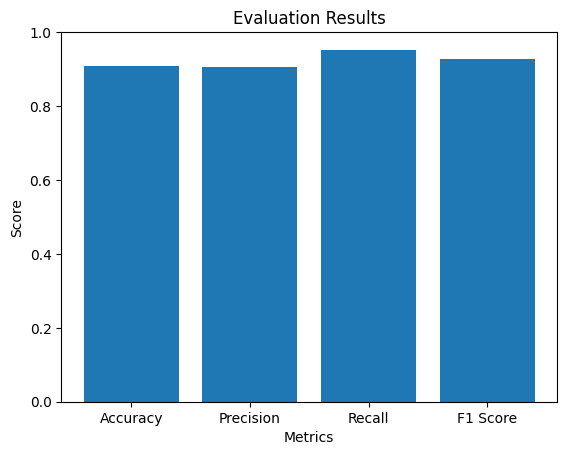

In [ ]:
# Create a bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.bar(metrics, scores)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Results')
plt.ylim([0, 1])  # Set the y-axis limits to 0 and 1
plt.show()

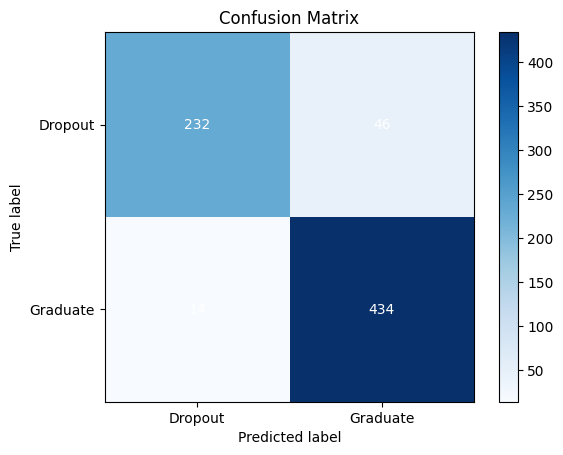

In [ ]:
# Plot the confusion matrix
labels = ['Dropout', 'Graduate']
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap=plt.cm.Blues)

# Add the actual numbers in the cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='white')

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels,
       yticklabels=labels,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Set the colorbar to show the intensity scale
cbar = ax.figure.colorbar(im, ax=ax)

# Display the plot
plt.show()
